In [174]:
import pandas as pd
import seaborn as sns
import pickle
import json
from datetime import datetime,time,timedelta
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from pprint import pprint

In [152]:
df = pd.read_hdf("store.h5")

df["time_of_day"] = df['time'].apply(lambda x: datetime.fromtimestamp(x).time())
df["day_of_month"] = df['time'].apply(lambda x: int((datetime.fromtimestamp(x)).strftime("%d")))
# df["day_of_month"].astype(int,inplace = True)
df["range"] = df["high"] - df["low"]

In [153]:
# note that time is in UTC
df.head()

,time,low,high,open,close,volume,day,time_of_day,day_of_month,range
date_time,,,,,,,,,,
2017-07-31 12:00:00,1501466400,194.00,196.00,194.33,195.28,2841.638143,0,12:00:00,31,2.00
2017-07-31 13:00:00,1501470000,194.92,196.49,195.29,195.40,2157.584857,0,13:00:00,31,1.57
2017-07-31 14:00:00,1501473600,195.00,195.97,195.39,195.77,1311.341183,0,14:00:00,31,0.97
2017-07-31 15:00:00,1501477200,195.00,195.90,195.77,195.41,1739.863734,0,15:00:00,31,0.90
2017-07-31 16:00:00,1501480800,195.06,197.50,195.43,197.34,2879.591574,0,16:00:00,31,2.44


In [81]:
exchange_times = {
    'asia': [time(),time(hour = 6)],
    'usa': [time(hour=13,minute=30),time(hour = 20)],
    'euro': [time(hour=8),time(hour=16,minute=30)],
    
}

In [82]:
df['is_asia'] = (exchange_times["asia"][0] <= df['time_of_day']) & (df['time_of_day'] <= exchange_times["asia"][1])
df['is_usa'] = (exchange_times["usa"][0] <= df['time_of_day']) & (df['time_of_day'] <= exchange_times["usa"][1])
df['is_euro'] = (exchange_times["euro"][0] <= df['time_of_day']) & (df['time_of_day'] <= exchange_times["euro"][1])
print(df.head().to_latex())

\begin{tabular}{lrrrrrrrlrlll}
\toprule
{} &        time &     low &    high &    open &   close &       volume &  day & time\_of\_day &  range &  is\_asia &  is\_usa &  is\_euro \\
date\_time           &             &         &         &         &         &              &      &             &        &          &         &          \\
\midrule
2017-07-31 12:00:00 &  1501466400 &  194.00 &  196.00 &  194.33 &  195.28 &  2841.638143 &    0 &    12:00:00 &   2.00 &    False &   False &     True \\
2017-07-31 13:00:00 &  1501470000 &  194.92 &  196.49 &  195.29 &  195.40 &  2157.584857 &    0 &    13:00:00 &   1.57 &    False &   False &     True \\
2017-07-31 14:00:00 &  1501473600 &  195.00 &  195.97 &  195.39 &  195.77 &  1311.341183 &    0 &    14:00:00 &   0.97 &    False &    True &     True \\
2017-07-31 15:00:00 &  1501477200 &  195.00 &  195.90 &  195.77 &  195.41 &  1739.863734 &    0 &    15:00:00 &   0.90 &    False &    True &     True \\
2017-07-31 16:00:00 &  1501480800 &  1

In [83]:
print("For the asia session")
df_asia  = df[df["is_asia"] == True]
print(df_asia[['range','volume']].resample("1D").mean().describe())
print('----------------------------------------------------')
print("For the usa session")
df_usa  = df[df["is_usa"] == True]
print(df_usa[['range','volume']].resample("1D").mean().describe())
print('----------------------------------------------------')
print("For the euro session")
df_euro  = df[df["is_euro"] == True]
print(df_euro[['range','volume']].resample("1D").mean().describe())

For the asia session
             range        volume
count  1100.000000   1100.000000
mean      5.053318   7559.744723
std       7.499806   7136.945473
min       0.292857    798.873352
25%       1.608571   3196.329492
50%       2.829286   5258.516808
75%       5.315714   9015.883759
max      84.672857  55962.362899
----------------------------------------------------
For the usa session
             range        volume
count  1100.000000   1100.000000
mean      4.340860   4472.978179
std       6.641011   4877.610076
min       0.190000    407.690536
25%       1.266786   1813.502618
50%       2.240000   3046.332611
75%       4.462143   5280.163938
max      75.645714  62737.359162
----------------------------------------------------
For the euro session
             range         volume
count  1101.000000    1101.000000
mean      4.691296    6347.743122
std       7.187887    6717.636049
min       0.212222     692.604705
25%       1.443333    2548.551281
50%       2.537778    4424.716103


## Find the ATR

In [88]:
df_ATR  =  df[["range","open"]]

/home/steve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/steve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/steve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

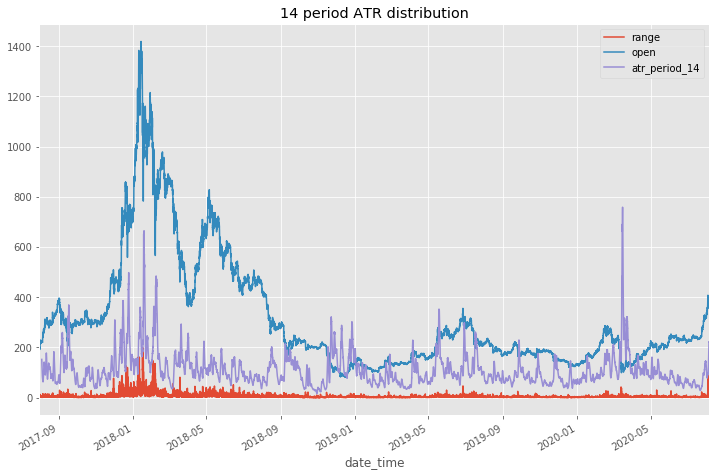

In [91]:
x = 14
df_ATR[f"atr_period_{x}"] = df_ATR["range"]
for i in range(1,x):
    df_ATR[f"atr_period_{x}"] = df_ATR[f"atr_period_{x}"] +  df_ATR[f"atr_period_{x}"].shift(i)
df_ATR[f"atr_period_{x}"]  = df_ATR[f"atr_period_{x}"]/df_ATR["open"].shift(x-1)

df_ATR.plot(figsize=(12,8))

plt.title("14 period ATR distribution")
plt.savefig("../../../report/fig/atr.png",dpi=250)
plt.show()

In [90]:
df_ATR

,range,open,atr_period_14
date_time,,,
2017-07-31 12:00:00,2.00,194.33,NaN
2017-07-31 13:00:00,1.57,195.29,NaN
2017-07-31 14:00:00,0.97,195.39,NaN
2017-07-31 15:00:00,0.90,195.77,NaN
2017-07-31 16:00:00,2.44,195.43,NaN
2017-07-31 17:00:00,1.61,197.25,NaN
2017-07-31 18:00:00,1.70,195.86,NaN
2017-07-31 19:00:00,2.21,194.31,NaN
2017-07-31 20:00:00,1.44,194.80,NaN


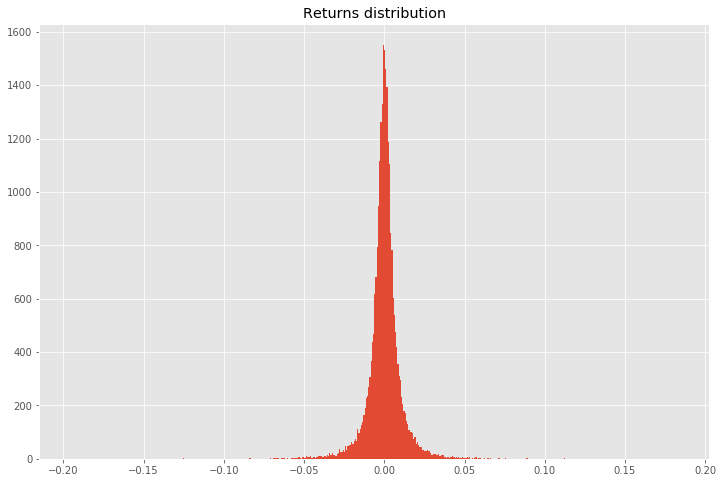

In [99]:

df["close"].pct_change().hist(figsize=(12,8),bins = 500)
plt.title("Returns distribution")
plt.savefig("../../../report/fig/ret.png",dpi=250)
plt.show()


In [101]:
df["close"].pct_change().describe()

count    26387.000000
mean         0.000090
std          0.011256
min         -0.196000
25%         -0.003853
50%          0.000060
75%          0.004015
max          0.183455
Name: close, dtype: float64

## price movements

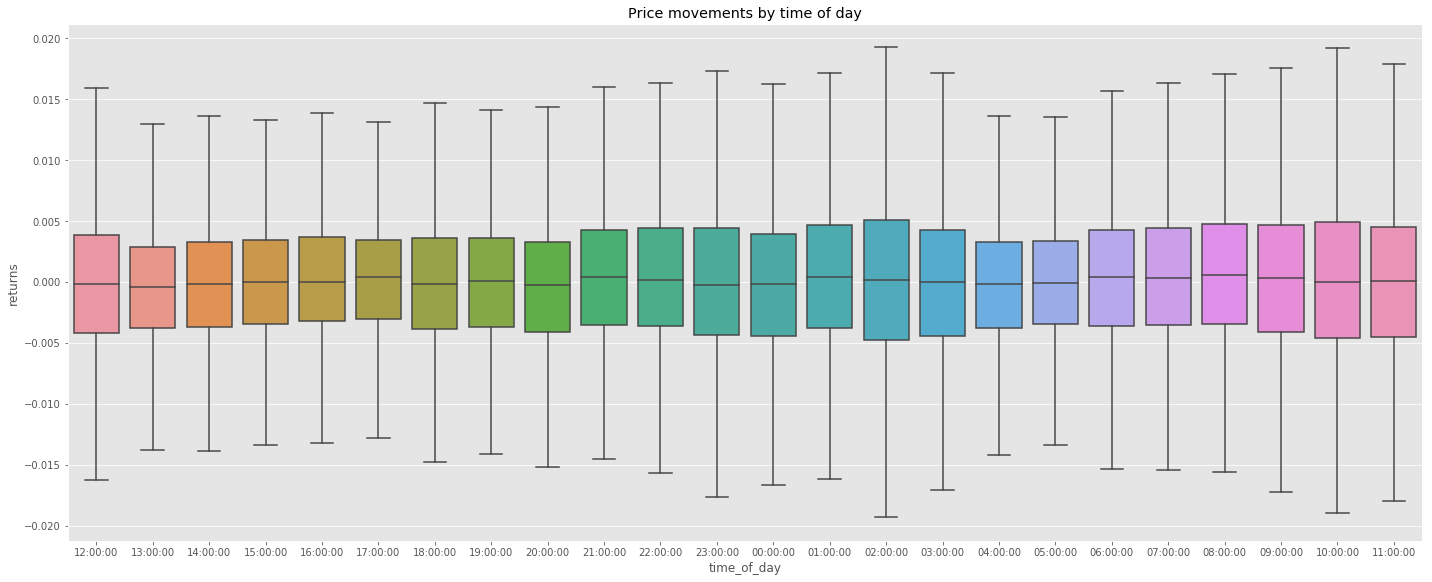

In [110]:
plt.figure(figsize=(20,8))
df['returns'] = df["close"].pct_change()
sns.boxplot(x='time_of_day',y="returns",data = df,showfliers=False)

plt.tight_layout()
plt.title("Price movements by time of day")
plt.savefig("../../../report/fig/pm.png",dpi=250)
plt.show()

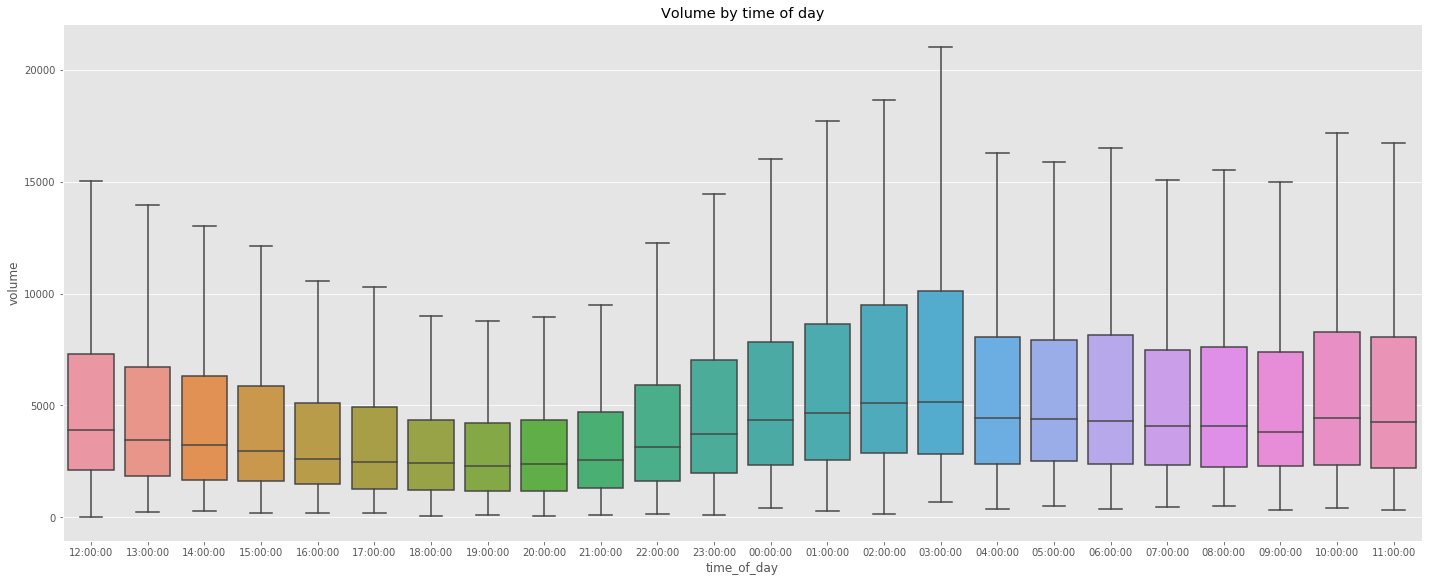

In [111]:
plt.figure(figsize=(20,8))
df['returns'] = df["close"].pct_change()
sns.boxplot(x='time_of_day',y="volume",data = df,showfliers=False)

plt.tight_layout()
plt.title("Volume by time of day")
plt.savefig("../../../report/fig/vol_times.png",dpi=250)
plt.show()

## Quiet day in month

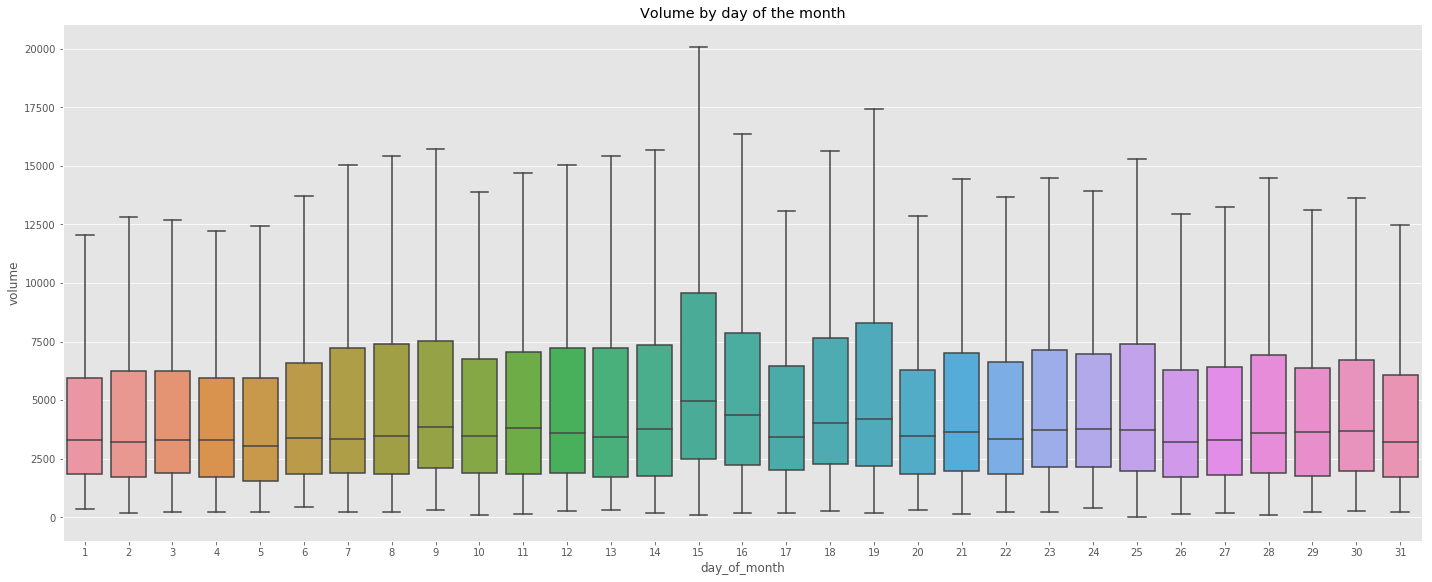

In [156]:
# df.resample("1D").mean()


plt.figure(figsize=(20,8))
sns.boxplot(x='day_of_month',y="volume",data = df,showfliers=False)

plt.tight_layout()
plt.title("Volume by day of the month")
plt.savefig("../../../report/fig/qt.png",dpi=250)
plt.show()

## 1SD 2SD 3SD

In [162]:
df_rd1 = df.resample("1D").mean()
df_rd1['returns'] = df_rd1['close'].pct_change()
df_rd1['z_returns'] =  (df_rd1['returns'] - df_rd1['returns'].mean())/df_rd1['returns'].std()
df_rd1.head()

,time,low,high,open,close,volume,day,day_of_month,range,returns,z_returns
date_time,,,,,,,,,,,
2017-07-31,1.501486e+09,193.695833,195.868333,194.555000,194.580833,3335.321224,0.0,31.0,2.172500,NaN,NaN
2017-08-01,1.501551e+09,204.393750,209.042083,206.008333,206.938750,14944.681598,1.0,1.0,4.648333,0.063510,1.410082
2017-08-02,1.501637e+09,221.077917,225.050417,223.161250,223.126667,9510.176772,2.0,2.0,3.972500,0.078226,1.745290
2017-08-03,1.501724e+09,219.288333,221.447917,220.238333,220.490000,5706.392778,3.0,3.0,2.159583,-0.011817,-0.305855
2017-08-04,1.501810e+09,222.810417,224.510000,223.856250,223.817083,4445.109779,4.0,4.0,1.699583,0.015089,0.307066


In [177]:
# print("For days between 1 and 2 SD")

# pprint(list(df_rd1[(1 < df_rd1["z_returns"].abs()) & ((df_rd1["z_returns"].abs()<2 )) ].index))
# print('------------------------------------------------------------------------')
# print("For days between 2 and 3 SD")
# pprint(list(df_rd1[(2 < df_rd1["z_returns"].abs()) & ((df_rd1["z_returns"].abs()<3 )) ].index))
# print('------------------------------------------------------------------------')
# print("For days greater than 3 SD")
# pprint(list(df_rd1[(3 < df_rd1["z_returns"].abs()) ].index))

In [213]:
df_rd1_m = df_rd1[df_rd1["z_returns"].abs() > 1]
df_rd1_m["is_up"] = df_rd1_m["z_returns"] > 0
df_rd1_m
df_rd1[df_rd1["z_returns"].abs() > 1].groupby("is_up").count()["day"]/len(df_rd1_m)


/home/steve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


is_up
False    0.508065
True     0.491935
Name: day, dtype: float64

In [193]:
df_rd1[df_rd1['z_returns'].abs() > 1]["z_returns"] > 0

date_time
2017-08-01     True
2017-08-02     True
2017-08-06     True
2017-08-07     True
2017-08-09     True
2017-08-17     True
2017-08-21     True
2017-08-30     True
2017-09-03    False
2017-09-05    False
2017-09-06     True
2017-09-09    False
2017-09-13    False
2017-09-14    False
2017-09-15    False
2017-09-16     True
2017-09-17    False
2017-09-18     True
2017-09-19     True
2017-09-22    False
2017-09-24     True
2017-09-28     True
2017-10-14     True
2017-10-18    False
2017-11-09     True
2017-11-11    False
2017-11-24     True
2017-11-25     True
2017-12-01    False
2017-12-02     True
              ...  
2020-03-03     True
2020-03-09    False
2020-03-12    False
2020-03-13    False
2020-03-15    False
2020-03-16    False
2020-03-20     True
2020-03-23    False
2020-03-24     True
2020-04-03     True
2020-04-07     True
2020-04-17     True
2020-04-19     True
2020-04-21    False
2020-04-23     True
2020-04-30     True
2020-05-04    False
2020-05-10    False
2020-05-11